# Reference

## https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes

---
#**Introduction To Machine Learning**
##**Supervised Learning (= classification):**

*   k-Nearest Neighbor (kNN)
*   **naive Bayesian (NB)**
*   Decision Tree (DT)
*   Support Vector Machine (SVM)
---

Bayes theorem provides a way of calculating the posterior probability, P(c|x), from P(c), P(x), and P(x|c). Naive Bayes classifier assumes that the effect of the value of a predictor (x) on a given class *c* is independent of the values of other predictors. This assumption is called class conditional independence.
![Naive Bayes Equation](https://miro.medium.com/max/954/1*2SnqzKlKD9DC5qL8C4HaQQ.png)

## <font color = #950CDF> Part 1: </font> <font color = #4854E8> Information of Dataset </font>
<b>Breast Cancer Wisconsin (Diagnostic) Data Set:</b> Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. This data set is originally from the University of Wisconsin CS department at ftp ftp.cs.wisc.edu > cd math-prog/cpo-dataset/machine-learn/WDBC/. But I found it in the University of California Urvine Machine Learning Depository at the link below. The first column is a unique Id, the second column is a binary variable ‘M’ for malignant and ‘B’ for benign. Then there are 30 independent variables which are all different measurements of cell nucleus size and shape.

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

# Anusha, Yarrasani
# Sam Id: 000932535

### <font color = #27C3E5> 1.1: </font> <font color = #41EA46> Import Libraries and Dataset </font>

#### <font color = blue>Import the Libraries

In [305]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score

#### <font color = blue>Import the Dataset

In [306]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

iris = pd.read_csv('iris.csv')  

label_encoder = LabelEncoder()

iris['species'] = label_encoder.fit_transform(iris['species'])

print(iris)

iris.to_csv('iris_categorical.csv', index=False)

     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
5             5.4          3.9           1.7          0.4        0
6             4.6          3.4           1.4          0.3        0
7             5.0          3.4           1.5          0.2        0
8             4.4          2.9           1.4          0.2        0
9             4.9          3.1           1.5          0.1        0
10            5.4          3.7           1.5          0.2        0
11            4.8          3.4           1.6          0.2        0
12            4.8          3.0           1.4          0.1        0
13            4.3          3.0           1.1          0.1     

In [307]:
df = pd.read_csv("iris_categorical.csv")
df = df.iloc[:, 0:5]
df.tail(3)

,sepal_length,sepal_width,petal_length,petal_width,species
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


### <font color = #27C3E5> 1.2: </font> <font color = #41EA46> Data Information and Visualization </font>

#### <font color = blue> View all Rows and Cols

In [308]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### <font color = blue> Data Information

In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


#### <font color = blue> Visualize Target Class Label Distributiuon

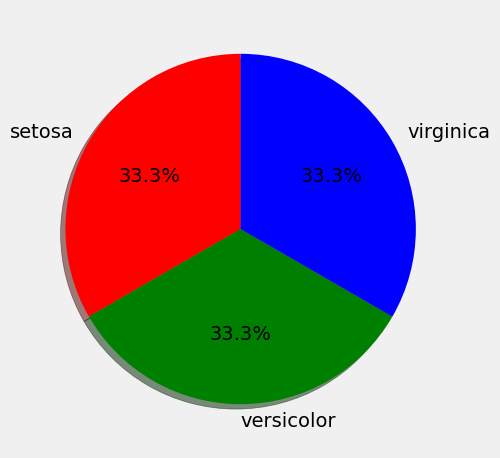

In [310]:
class_labels = ['setosa', 'versicolor', 'virginica']

# Replace the integer labels with string labels
df['species'] = df['species'].replace([0, 1, 2], class_labels)

# Count the occurrences of each class
class_counts = df['species'].value_counts()
class_labels = class_counts.index
colors = ['red', 'green', 'blue']

# Create the pie chart
plt.pie(class_counts, labels=class_labels, colors=colors, shadow=True, autopct='%1.1f%%', startangle=90)

plt.tight_layout()
plt.show()

![Machine Learning Project](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## <font color = #950CDF> Part 2: </font> <font color = #4854E8> Data Preprocessing </font>

### <font color = #27C3E5> 2.1: </font> <font color = #41EA46> Define Predictor and Target Attributes </font>

In [311]:
X = df.iloc[:, 0:5]
Y = df.iloc[:, 0]

#### <font color = blue> Predictor Attributes

In [312]:
X.tail(4)

,sepal_length,sepal_width,petal_length,petal_width,species
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


#### <font color = blue> Target Attribute

In [313]:
Y.tail(3)

147    6.5
148    6.2
149    5.9
Name: sepal_length, dtype: float64

### <font color = #27C3E5> 2.2: </font> <font color = #41EA46> Split the Data into Training and Testing </font>

In [314]:
X_train, X_test, Y_train, Y_test = train_test_split(
                                                    X, 
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=0)

#### <font color = blue> Training Data

In [315]:
print("X_train", X_train.shape)
print("Y_train", Y_train.shape)

X_train (120, 5)
Y_train (120,)


#### <font color = blue> Testing Data

In [316]:
print("X_test", X_test.shape)
print("X_test", Y_test.shape)

X_test (30, 5)
X_test (30,)


### <font color = #27C3E5> 2.3: </font> <font color = #41EA46> Check Missing Value </font>

In [317]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### <font color = #27C3E5> 2.4: </font> <font color = #41EA46> Feature Selection - With Correlation </font>

#### <font color = blue> Correlation

In [318]:
corr = X_train.corr()
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.060566,0.875775,0.828151
sepal_width,-0.060566,1.000000,-0.377609,-0.325782
petal_length,0.875775,-0.377609,1.000000,0.968194
petal_width,0.828151,-0.325782,0.968194,1.000000


#### <font color = blue> Visualize the Correlation

<AxesSubplot:>

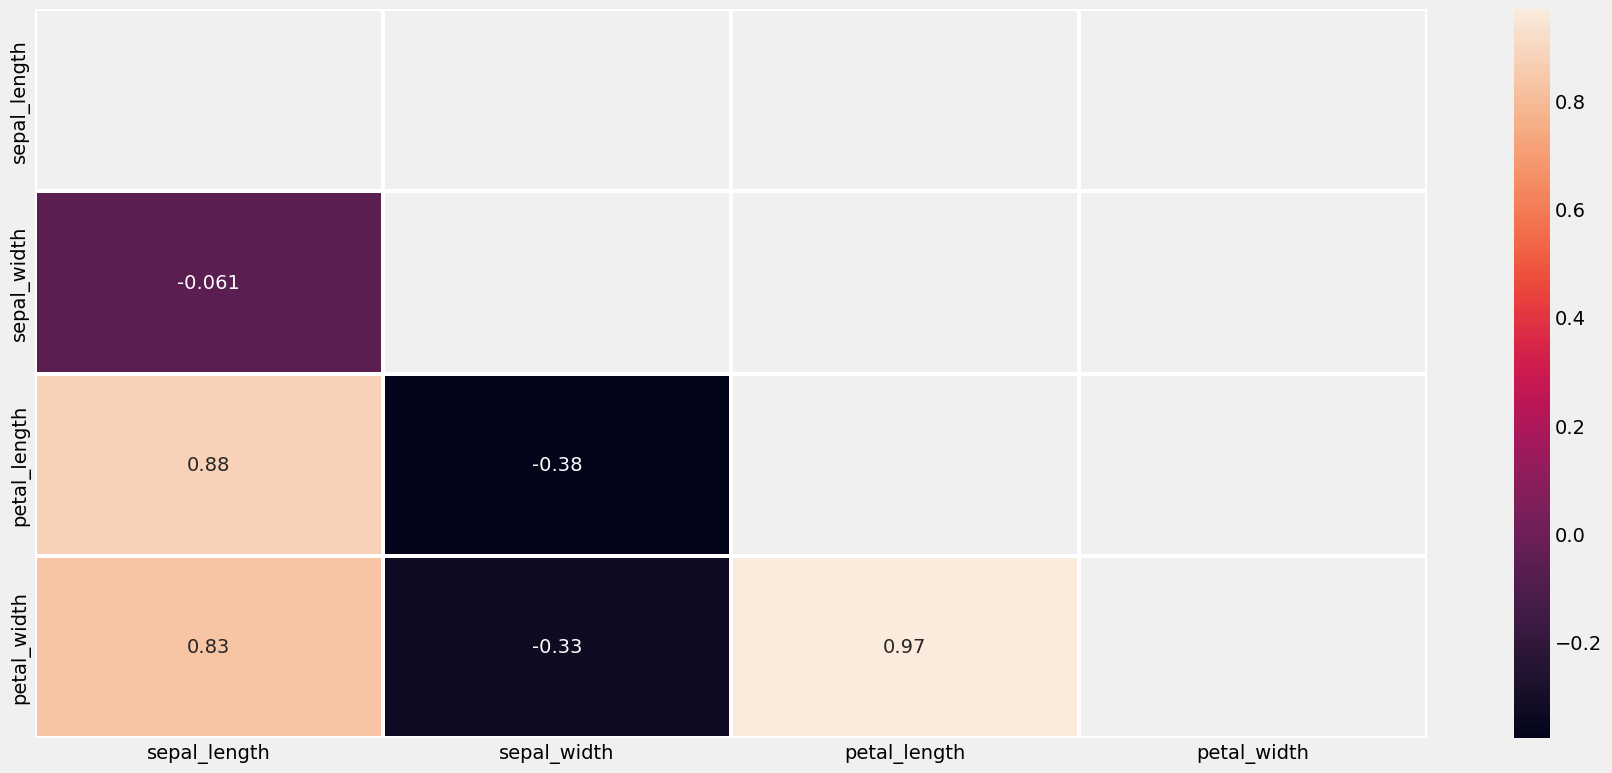

In [319]:
plt.figure(figsize = (20, 9))
matrix = np.triu(corr)        # take lower correlation matrix
sns.heatmap(corr, mask = matrix, annot = True, linewidth = 1.5)

#### <font color = blue> Remove Features (higest corr)

In [320]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [321]:
corr_features = correlation(X, 0.7)
len(set(corr_features))

2

In [322]:
corr_features

{'petal_length', 'petal_width'}

In [323]:
X_train = X_train.drop(corr_features,axis=1)
X_test = X_test.drop(corr_features,axis=1)

In [324]:
X_train.head()

,sepal_length,sepal_width,species
137,6.4,3.1,virginica
84,5.4,3.0,versicolor
27,5.2,3.5,setosa
127,6.1,3.0,virginica
132,6.4,2.8,virginica


In [325]:
X_train.shape   # 30 -20 = 10

(120, 3)

#### <font color = blue> Label Encoder

In [326]:
LE = LabelEncoder()
Y_train = LE.fit_transform(Y_train)
Y_test = LE.fit_transform(Y_test)        
Y_test                             

array([ 9, 10,  7, 18,  4, 13,  4, 16, 17, 11, 11, 14, 11, 15, 11,  3, 10,
        7,  2,  6,  8,  8,  2,  0, 12,  1,  5, 12,  4,  4], dtype=int64)

#### <font color = blue> Feature Scaling

In [327]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['species'] = label_encoder.fit_transform(df['species'])

X = df.iloc[:, :-1]  
Y = df.iloc[:, -1]   

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## <font color = #950CDF> Part 3: </font> <font color = #4854E8> Build Naive Bayes Classifier </font>

### <font color = #27C3E5> 3.1: </font> <font color = #41EA46> Implementation from Scratch </font>

#### <font color = blue> Build Model

In [328]:
class NaiveBayes:
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors = np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y == c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        posteriors = []

        # calculate posterior probability for each class
        for idx, c in enumerate(self._classes):
            prior = np.log(self._priors[idx])
            posterior = np.sum(np.log(self._pdf(idx, x)))
            posterior = prior + posterior
            posteriors.append(posterior)

        # return class with highest posterior probability
        return self._classes[np.argmax(posteriors)]

    def _pdf(self, class_idx, x):
        mean = self._mean[class_idx]
        var = self._var[class_idx]
        numerator = np.exp(-((x - mean) ** 2) / (2 * var))
        denominator = np.sqrt(2 * np.pi * var)
        return numerator / denominator

#### <font color = blue> Initialize Model

In [329]:
NB_scratch = NaiveBayes()

#### <font color = blue> Fit the Training Data into Model

In [330]:
NB_scratch.fit(X_train, Y_train)

#### <font color = blue> Predict the Test data

In [331]:
Y_pred_scratch = NB_scratch.predict(X_test)
Y_pred_scratch

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

#### <font color = blue> Accuracy Score

In [332]:
Accuracy_Scratch = accuracy_score(Y_pred_scratch, Y_test)
print('Accuracy Score:', Accuracy_Scratch)

Accuracy Score: 0.9666666666666667


### <font color = #27C3E5> 3.2: </font> <font color = #41EA46> Implementation with Scikit-Learn </font>

#### <font color = blue> Import Model From Sklearn

In [333]:
from sklearn.naive_bayes import GaussianNB

#### <font color = blue> Initialize Model

In [334]:
NB_Sklearn = GaussianNB()

#### <font color = blue> Fit the Training Data into Model

In [335]:
NB_Sklearn.fit(X_train, Y_train)

GaussianNB()

#### <font color = blue> Predict the Test data

In [336]:
Y_pred_Sklearn = NB_Sklearn.predict(X_test)
Y_pred_Sklearn

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

#### <font color = blue> Accuracy Score

In [337]:
Accuracy_Sklearn = accuracy_score(Y_pred_Sklearn, Y_test)
print('Accuracy Score:', Accuracy_Sklearn)

Accuracy Score: 0.9666666666666667


# Bernoulli NB

In [338]:
from sklearn.naive_bayes import BernoulliNB
BN_NB = BernoulliNB(force_alpha=True)
BN_NB.fit(X, Y)
BernoulliNB(force_alpha=True)

BernoulliNB(force_alpha=True)

In [339]:
Y_pred_BNlearn = BN_NB.predict(X_test)
Y_pred_BNlearn

C:\Users\ANUSHA REDDY\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [340]:
Accuracy_BNlearn = accuracy_score(Y_pred_BNlearn, Y_test)
print('Accuracy Score:', Accuracy_BNlearn)

Accuracy Score: 0.36666666666666664


# Categorical NB

In [341]:
from sklearn.naive_bayes import CategoricalNB 


Ct_NB = CategoricalNB(force_alpha=True)
label_encoder = LabelEncoder()
df_encoded = df.apply(label_encoder.fit_transform)

X = df_encoded.iloc[:, :-1]
Y = df_encoded.iloc[:, -1]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

Ct_NB.fit(X, Y)
CategoricalNB(force_alpha=True)

CategoricalNB(force_alpha=True)

In [342]:
Y_pred_Ctlearn = Ct_NB.predict(X_test)
Y_pred_Ctlearn

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

In [343]:
Accuracy_CtNB = accuracy_score(Y_pred_Ctlearn, Y_test)
print('Accuracy Score:', Accuracy_CtNB)

Accuracy Score: 0.9666666666666667


# Compliment NB 

In [344]:
from sklearn.naive_bayes import ComplementNB
CP_NB = ComplementNB(force_alpha=True)
CP_NB.fit(X, Y)
ComplementNB(force_alpha=True)

ComplementNB(force_alpha=True)

In [345]:
Y_pred_CPlearn = CP_NB.predict(X_test)
Y_pred_Sklearn

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [346]:
Accuracy_CPlearn = accuracy_score(Y_pred_CPlearn, Y_test)
print('Accuracy Score:', Accuracy_CPlearn)

Accuracy Score: 0.5666666666666667


# Multinomial NB

In [347]:
from sklearn.naive_bayes import MultinomialNB
MN_NB = MultinomialNB(force_alpha=True)
MN_NB.fit(X, Y)
MultinomialNB(force_alpha=True)

MultinomialNB(force_alpha=True)

In [348]:
Y_pred_MNlearn = MN_NB.predict(X_test)
Y_pred_MNlearn

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 2, 0], dtype=int64)

In [349]:
Accuracy_MNlearn = accuracy_score(Y_pred_MNlearn, Y_test)
print('Accuracy Score:', Accuracy_MNlearn)

Accuracy Score: 0.9


### <font color = #27C3E5> 3.3: </font> <font color = #41EA46> Comparison (Scratch vs. Scikit-Learn) </font>

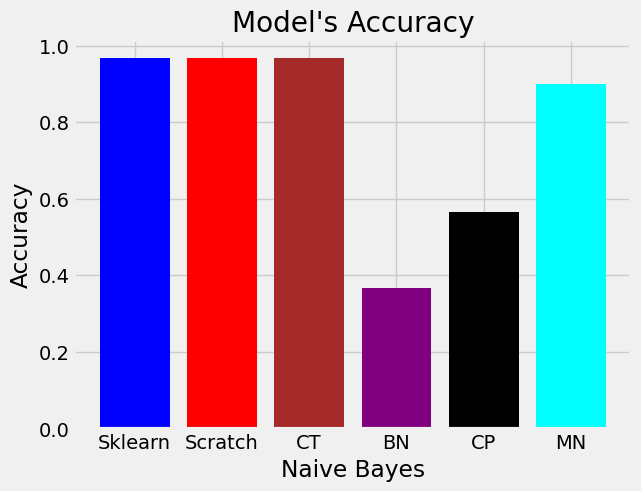

In [350]:
accuracy = [Accuracy_Sklearn, Accuracy_Scratch, Accuracy_CtNB, Accuracy_BNlearn, Accuracy_CPlearn, Accuracy_MNlearn]
label = ["Sklearn", "Scratch", "CT", "BN", "CP", "MN"]
plt.bar(label, accuracy, color = ['blue', 'red', 'brown', 'purple', 'black', 'cyan'])
plt.title("Model's Accuracy")
plt.xlabel("Naive Bayes")
plt.ylabel("Accuracy")
plt.show()

Both result are Equal

## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Evaluate the Result </font>

### <font color = #27C3E5> 4.1: </font> <font color = #41EA46> Confusion Matrix</font>

<AxesSubplot:>

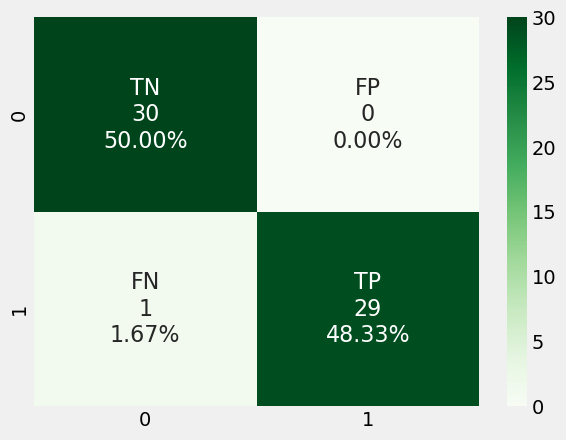

In [351]:
confusion_matrix_Scratch = np.array([[30, 0], [1, 29]])
labels = np.asarray([["TN", "FP"], ["FN", "TP"]])

#[row, column]
TP = confusion_matrix_Scratch[1, 1]        
TN = confusion_matrix_Scratch[0, 0]           
FP = confusion_matrix_Scratch[0, 1]           
FN = confusion_matrix_Scratch[1, 0]

group_names = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_Scratch.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix_Scratch.flatten()/np.sum(confusion_matrix_Scratch)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix_Scratch, annot=labels, fmt='', cmap='Greens', annot_kws={"size": 16})

### <font color = #27C3E5> 4.2: </font> <font color = #41EA46>  Evaluate the Results </font>

#### <font color = blue>4.2.1: Calculate the Results

In [352]:
# Accuracy Score
Accuracy = accuracy_score(Y_pred_scratch, Y_test)
print('Accuracy Score:', Accuracy) 

# Calculate precision for each class and then take the average
Precision = precision_score(Y_test, Y_pred_scratch, average='weighted')
print('Precision Score:', Precision) 

# Calculate recall for each class and then take the average
TPR = recall_score(Y_test, Y_pred_scratch, average='weighted')
print('True positive Rate:', TPR)      

# False positive Rate (FPR)
FPR = FP / float(TN + FP)
print('False positive Rate', FPR)                       

# Calculate the F1 score for each class and then take the weighted average
F1 = f1_score(Y_test, Y_pred_scratch, average='weighted')
print('F1 Score:', F1)               

# Specificity
Specificity = TN / (TN + FP)
print('Specificity:', Specificity )                    

# Mean Absolute Error
Error = mean_absolute_error(Y_test, Y_pred_scratch)
print('Mean Absolute Error:', Error)   

Accuracy Score: 0.9666666666666667
Precision Score: 0.9690476190476189
True positive Rate: 0.9666666666666667
False positive Rate 0.0
F1 Score: 0.9657687991021324
Specificity: 1.0
Mean Absolute Error: 0.03333333333333333


#### <font color = blue>4.2.2: Visualize the Results

<BarContainer object of 7 artists>

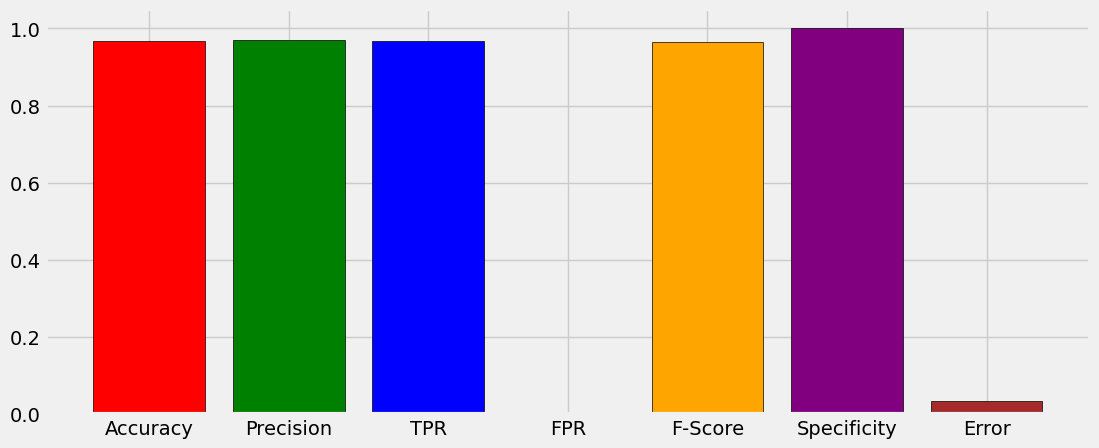

In [353]:
plt.figure(figsize = (12, 5))

result = [Accuracy, Precision, TPR, FPR, F1, Specificity, Error]
label = ["Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error"]
colors=[ 'red', 'green', 'blue', 'darkgoldenrod', 'orange', 'purple', 'brown']

plt.bar(label, result, color = colors, edgecolor='black')